**Dynamic Evaluation: Iterative Policy Evaluation**

In this notebook, we implement the iterative policy evaluation for a 4x4 grid world with equiprobable random actions (Sutton&Barto book, Example 4.1) [adapted from Shangtong Zhang repository]

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.table import Table

Define equiprobable actions [left, up, right, down]

In [2]:
WORLD_SIZE = 4
# left, up, right, down
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
ACTION_PROB = 0.25

Terminal states are the top-left and bottom-right corners

In [3]:
def is_terminal(state):
    x, y = state
    return (x == 0 and y == 0) or (x == WORLD_SIZE - 1 and y == WORLD_SIZE - 1)

Define the step function

In [4]:
def step(state, action):
    state = np.array(state)
    next_state = (state + action).tolist()
    x, y = next_state

    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        next_state = state.tolist()

    reward = -1
    return next_state, reward

We define a function that show the grid-world image

In [5]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(len(image))):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right',
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(range(len(image))):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center',
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)
    plt.show()

We start with zero values

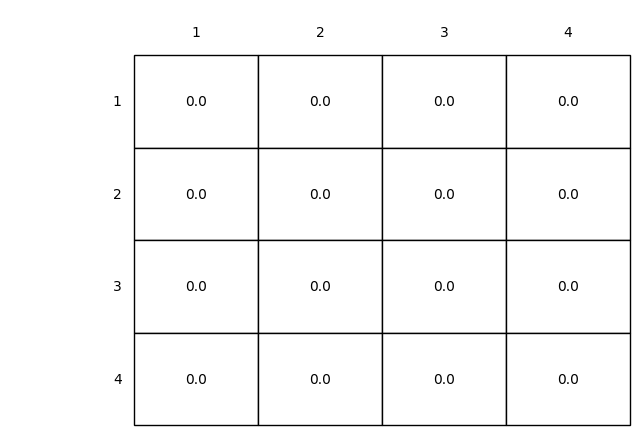

Iteration= 0


In [6]:
state_values = np.zeros((WORLD_SIZE, WORLD_SIZE))
iteration = 0
draw_image(np.round(state_values, decimals=2))
print("Iteration=", iteration)


We define de function that update the values


In [7]:
def update_state_value(state_values, in_place=False):
    new_state_values = state_values.copy()
    src = new_state_values if in_place else state_values
    for i in range(WORLD_SIZE):
        for j in range(WORLD_SIZE):
            if is_terminal([i, j]):
                continue
            value = 0
            for action in ACTIONS:
                (next_i, next_j), reward = step([i, j], action)
                value += ACTION_PROB * (reward + src[next_i, next_j])
            new_state_values[i, j] = value

    return new_state_values

Now, run iteration 2

Iteration= 10


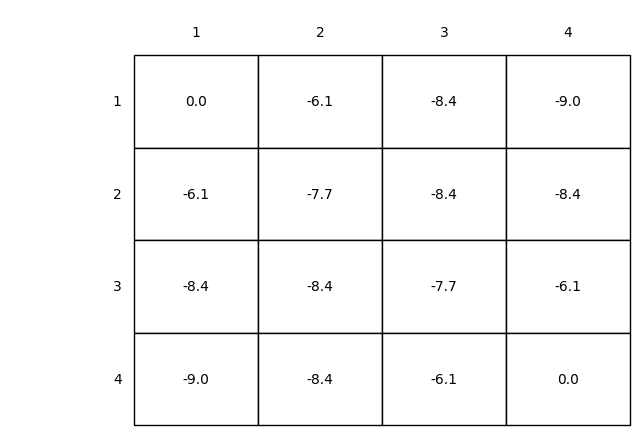

In [17]:
iteration += 1
state_values = update_state_value(state_values, in_place=False)
print("Iteration=", iteration)
draw_image(np.round(state_values, decimals=1))